In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import lightgbm as lgb
import optuna
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import time
import pickle
from random import sample

import optuna

from sklearn.naive_bayes import GaussianNB


In [2]:
df = pd.read_csv('train.csv')
X = df.drop(['ID_code', 'target'], axis=1).values
sc = StandardScaler()
X = sc.fit_transform(X)
y = df['target'].values
del df

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=0, stratify=y)

In [4]:
classifiers = [LogisticRegression(),
            MLPClassifier(alpha=1),
            RandomForestClassifier(max_depth=2, n_estimators=10, max_features=1),
            RandomForestClassifier(max_depth=3, n_estimators=10, max_features=1),
            RandomForestClassifier(max_depth=4, n_estimators=10, max_features=1),
            RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
            RandomForestClassifier(max_depth=6, n_estimators=10, max_features=1),
            RandomForestClassifier(max_depth=7, n_estimators=10, max_features=1),
            RandomForestClassifier(max_depth=8, n_estimators=10, max_features=1),
            RandomForestClassifier(max_depth=9, n_estimators=10, max_features=1),
            RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)),
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3)),
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4)),
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5)),
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6)),
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7)),
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8)),
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9)),
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10)),
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=11)),
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12)),
            GaussianNB(var_smoothing=1e-7),
            GaussianNB(var_smoothing=1.1*1e-7),
            GaussianNB(var_smoothing=1.2*1e-7),
            GaussianNB(var_smoothing=0.9*1e-7),
            GaussianNB(var_smoothing=0.8*1e-7),
            ]

In [5]:
scores = []
times = []
names = []
clfs = []

len_pn = len(X_pn_train)
num_sample = 10000

sampling = sample([i for i in range(len_pn)], num_sample) 
X_clf_train = X_pn_train[sampling]
y_clf_train = y_pn_train[sampling]

for clf in classifiers:
    name = str(clf).split('(')[0]
    print('fitting with %s.....' % name)
    t1 = time.time() 
    clf.fit(X_clf_train, y_clf_train)
    pred = clf.predict(X_pn_val)
    score = metrics.accuracy_score(y_pn_val, pred)
    t2 = time.time()
    elapsed_time = t2-t1

    scores.append(score)
    times.append(elapsed_time)
    names.append(name)
    clfs.append(clf)

fitting with LogisticRegression.....


/home/ryoji/Documents/python/kaggle/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


fitting with MLPClassifier.....
fitting with RandomForestClassifier.....
fitting with RandomForestClassifier.....
fitting with RandomForestClassifier.....
fitting with RandomForestClassifier.....
fitting with RandomForestClassifier.....
fitting with RandomForestClassifier.....
fitting with RandomForestClassifier.....
fitting with RandomForestClassifier.....
fitting with RandomForestClassifier.....
fitting with AdaBoostClassifier.....
fitting with AdaBoostClassifier.....
fitting with AdaBoostClassifier.....
fitting with AdaBoostClassifier.....
fitting with AdaBoostClassifier.....
fitting with AdaBoostClassifier.....
fitting with AdaBoostClassifier.....
fitting with AdaBoostClassifier.....
fitting with AdaBoostClassifier.....
fitting with AdaBoostClassifier.....
fitting with AdaBoostClassifier.....
fitting with GaussianNB.....
fitting with GaussianNB.....
fitting with GaussianNB.....
fitting with GaussianNB.....
fitting with GaussianNB.....


In [6]:
predicts_train = []
predicts_val = []
for clf in clfs:
    name = str(clf).split('(')[0]
    print('predicting with %s.....' % name)
    if hasattr(clf,'predict_proba') == True:
        pred_train = clf.predict_proba(X_train)[:,0]
        pred_val = clf.predict_proba(X_val)[:,0]
        predicts_train.append(pred_train)
        predicts_val.append(pred_val)
    else:
        pred_train = clf.predict(X_train)
        pred_val = clf.predict(X_val)
        predicts_train.append(pred_train)
        predicts_val.append(pred_val)
        

param_train = np.array(predicts_train).T
X_train = np.hstack([X_train, param_train])

param_val = np.array(predicts_val).T
X_val = np.hstack([X_val, param_val])

del predicts_train, predicts_val

predicting with LogisticRegression.....
predicting with MLPClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with GaussianNB.....
predicting with GaussianNB.....
predicting with GaussianN

In [7]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [8]:
def objective(trial):
    """最小化する目的関数"""
    # LightGBM parameters
    params = {
        'objective': 'binary',
        'boost_from_average':False,
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.8, 1.0), # 1.0 use
        'learning_rate': trial.suggest_uniform('learning_rate', 0.001, 1.0), # small for acc
        'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100), # 20 use
        'min_sum_hessian_in_leaf' : trial.suggest_uniform('min_sum_hessian_in_leaf', 1e-4, 1e-2) ,#1e-3 use
        'bagging_fraction' : trial.suggest_uniform('bagging_fraction', 0.8, 1.0) ,# 1.0 use
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 10) ,# 0 use
        'min_gain_to_split': trial.suggest_uniform('min_gain_to_split', 0.8, 1.0),# 0.0 use
        'lambda_l1': trial.suggest_uniform('lambda_l1', 0.0, 0.5),
        'lambda_l2': trial.suggest_uniform('lambda_l2', 0.0, 0.5),
        'num_leaves'   : trial.suggest_int('num_leaves', 16, 31), # 31, small for overfit, large for acc
        'max_bin': trial.suggest_int('max_bin', 128, 255), # 255, small for overfit, large for acc, 
    }
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    valid_sets=lgb_val,
                    num_boost_round=10000,
                    early_stopping_rounds=100,
                    verbose_eval = 200)    
    
    y_val_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
    fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
    auc_val = metrics.auc(fpr_val, tpr_val)
    return  -auc_val

In [9]:
v

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.883156


[I 2019-04-02 20:18:15,140] Finished trial#0 resulted in value: -0.8831556676041693. Current best value is -0.8831556676041693 with parameters: {'feature_fraction': 0.977548270191196, 'learning_rate': 0.8995035959334565, 'subsample': 0.9624003850530691, 'min_data_in_leaf': 46, 'min_sum_hessian_in_leaf': 0.009235553605422041, 'bagging_fraction': 0.8611859293516516, 'bagging_freq': 5, 'min_gain_to_split': 0.8205195066228963, 'lambda_l1': 0.32310739434865415, 'lambda_l2': 0.41073929462252756, 'num_leaves': 28, 'max_bin': 155}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[7]	valid_0's auc: 0.885637


[I 2019-04-02 20:18:19,805] Finished trial#1 resulted in value: -0.8856370627407708. Current best value is -0.8856370627407708 with parameters: {'feature_fraction': 0.816382052448592, 'learning_rate': 0.5189152918483096, 'subsample': 0.8298591440064738, 'min_data_in_leaf': 92, 'min_sum_hessian_in_leaf': 0.0033455408007232973, 'bagging_fraction': 0.8601300216031158, 'bagging_freq': 1, 'min_gain_to_split': 0.8005423576156931, 'lambda_l1': 0.170298396695854, 'lambda_l2': 0.3301799976496548, 'num_leaves': 25, 'max_bin': 216}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.88873


[I 2019-04-02 20:18:26,107] Finished trial#2 resulted in value: -0.8887298360891486. Current best value is -0.8887298360891486 with parameters: {'feature_fraction': 0.8292630568957517, 'learning_rate': 0.22108930947254196, 'subsample': 0.908113047454014, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 0.0036479978847044742, 'bagging_fraction': 0.9589534907792596, 'bagging_freq': 1, 'min_gain_to_split': 0.9987286063811592, 'lambda_l1': 0.24978014005567856, 'lambda_l2': 0.1911646877025865, 'num_leaves': 27, 'max_bin': 185}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[5]	valid_0's auc: 0.884593


[I 2019-04-02 20:18:30,090] Finished trial#3 resulted in value: -0.884593423930929. Current best value is -0.8887298360891486 with parameters: {'feature_fraction': 0.8292630568957517, 'learning_rate': 0.22108930947254196, 'subsample': 0.908113047454014, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 0.0036479978847044742, 'bagging_fraction': 0.9589534907792596, 'bagging_freq': 1, 'min_gain_to_split': 0.9987286063811592, 'lambda_l1': 0.24978014005567856, 'lambda_l2': 0.1911646877025865, 'num_leaves': 27, 'max_bin': 185}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.886223
[400]	valid_0's auc: 0.8894
[600]	valid_0's auc: 0.891103
[800]	valid_0's auc: 0.891881
[1000]	valid_0's auc: 0.892352
[1200]	valid_0's auc: 0.89277
[1400]	valid_0's auc: 0.892984
[1600]	valid_0's auc: 0.893104
Early stopping, best iteration is:
[1647]	valid_0's auc: 0.893172


[I 2019-04-02 20:19:43,730] Finished trial#4 resulted in value: -0.8931722847684866. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[6]	valid_0's auc: 0.884128


[I 2019-04-02 20:19:47,805] Finished trial#5 resulted in value: -0.8841283438283845. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[11]	valid_0's auc: 0.885644


[I 2019-04-02 20:19:51,966] Finished trial#6 resulted in value: -0.8856438140039103. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890527
Early stopping, best iteration is:
[121]	valid_0's auc: 0.890845


[I 2019-04-02 20:20:01,407] Finished trial#7 resulted in value: -0.8908454531124256. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.885026
[400]	valid_0's auc: 0.886761
[600]	valid_0's auc: 0.888546
[800]	valid_0's auc: 0.889877
[1000]	valid_0's auc: 0.890779
[1200]	valid_0's auc: 0.891318
[1400]	valid_0's auc: 0.891718
[1600]	valid_0's auc: 0.89202
[1800]	valid_0's auc: 0.892207
Early stopping, best iteration is:
[1884]	valid_0's auc: 0.892384


[I 2019-04-02 20:21:26,303] Finished trial#8 resulted in value: -0.8923840359071791. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.885655


[I 2019-04-02 20:21:31,557] Finished trial#9 resulted in value: -0.8856549243775563. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[21]	valid_0's auc: 0.886953


[I 2019-04-02 20:21:36,365] Finished trial#10 resulted in value: -0.8869527605164838. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[23]	valid_0's auc: 0.886621


[I 2019-04-02 20:21:42,370] Finished trial#11 resulted in value: -0.8866212572490522. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.886034
[400]	valid_0's auc: 0.888661
[600]	valid_0's auc: 0.890448
[800]	valid_0's auc: 0.891501
[1000]	valid_0's auc: 0.892159
[1200]	valid_0's auc: 0.892496
[1400]	valid_0's auc: 0.892707
[1600]	valid_0's auc: 0.892915
[1800]	valid_0's auc: 0.89306
Early stopping, best iteration is:
[1735]	valid_0's auc: 0.893121


[I 2019-04-02 20:23:21,733] Finished trial#12 resulted in value: -0.8931211023813673. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.887272
[400]	valid_0's auc: 0.890383
[600]	valid_0's auc: 0.891671
[800]	valid_0's auc: 0.892668
[1000]	valid_0's auc: 0.892923
Early stopping, best iteration is:
[905]	valid_0's auc: 0.892952


[I 2019-04-02 20:24:07,244] Finished trial#13 resulted in value: -0.8929519785729496. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889336
Early stopping, best iteration is:
[100]	valid_0's auc: 0.890384


[I 2019-04-02 20:24:15,474] Finished trial#14 resulted in value: -0.8903841963058525. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[24]	valid_0's auc: 0.887292


[I 2019-04-02 20:24:23,863] Finished trial#15 resulted in value: -0.8872918585228389. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890837
Early stopping, best iteration is:
[182]	valid_0's auc: 0.891119


[I 2019-04-02 20:24:37,892] Finished trial#16 resulted in value: -0.8911192439691482. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[6]	valid_0's auc: 0.885014


[I 2019-04-02 20:24:43,013] Finished trial#17 resulted in value: -0.8850144047688185. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[27]	valid_0's auc: 0.886867


[I 2019-04-02 20:24:49,194] Finished trial#18 resulted in value: -0.8868666948747091. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.884872
[400]	valid_0's auc: 0.886484
[600]	valid_0's auc: 0.887989
[800]	valid_0's auc: 0.889516
[1000]	valid_0's auc: 0.890502
[1200]	valid_0's auc: 0.891171
[1400]	valid_0's auc: 0.891704
[1600]	valid_0's auc: 0.89213
[1800]	valid_0's auc: 0.892412
[2000]	valid_0's auc: 0.892618
[2200]	valid_0's auc: 0.892777
[2400]	valid_0's auc: 0.89288
[2600]	valid_0's auc: 0.893024
Early stopping, best iteration is:
[2598]	valid_0's auc: 0.893028


[I 2019-04-02 20:27:13,486] Finished trial#19 resulted in value: -0.8930282301665657. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[8]	valid_0's auc: 0.885125


[I 2019-04-02 20:27:18,119] Finished trial#20 resulted in value: -0.8851247998473447. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[16]	valid_0's auc: 0.887595


[I 2019-04-02 20:27:22,717] Finished trial#21 resulted in value: -0.8875946248468608. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[49]	valid_0's auc: 0.890517


[I 2019-04-02 20:27:29,001] Finished trial#22 resulted in value: -0.8905171474478635. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.89026
Early stopping, best iteration is:
[177]	valid_0's auc: 0.890502


[I 2019-04-02 20:27:43,199] Finished trial#23 resulted in value: -0.8905016191969557. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 0.88507


[I 2019-04-02 20:27:48,406] Finished trial#24 resulted in value: -0.8850703714612042. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[6]	valid_0's auc: 0.884153


[I 2019-04-02 20:27:52,526] Finished trial#25 resulted in value: -0.8841528806772143. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[24]	valid_0's auc: 0.887989


[I 2019-04-02 20:27:57,608] Finished trial#26 resulted in value: -0.8879891122486512. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[72]	valid_0's auc: 0.889268


[I 2019-04-02 20:28:07,018] Finished trial#27 resulted in value: -0.889268464514559. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[21]	valid_0's auc: 0.88684


[I 2019-04-02 20:28:15,060] Finished trial#28 resulted in value: -0.8868396379691315. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.883591


[I 2019-04-02 20:28:21,196] Finished trial#29 resulted in value: -0.883591080865821. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[14]	valid_0's auc: 0.886888


[I 2019-04-02 20:28:27,257] Finished trial#30 resulted in value: -0.8868878612772713. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891007
[400]	valid_0's auc: 0.892035
Early stopping, best iteration is:
[396]	valid_0's auc: 0.892173


[I 2019-04-02 20:28:54,306] Finished trial#31 resulted in value: -0.8921732775809667. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[63]	valid_0's auc: 0.88871


[I 2019-04-02 20:29:01,749] Finished trial#32 resulted in value: -0.888710297871399. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[3]	valid_0's auc: 0.883507


[I 2019-04-02 20:29:06,490] Finished trial#33 resulted in value: -0.8835069683544478. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 0.886899


[I 2019-04-02 20:29:11,303] Finished trial#34 resulted in value: -0.8868992862259022. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890316
Early stopping, best iteration is:
[132]	valid_0's auc: 0.890692


[I 2019-04-02 20:29:21,358] Finished trial#35 resulted in value: -0.8906916363153659. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[13]	valid_0's auc: 0.88631


[I 2019-04-02 20:29:25,861] Finished trial#36 resulted in value: -0.8863101564163618. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[49]	valid_0's auc: 0.888415


[I 2019-04-02 20:29:32,408] Finished trial#37 resulted in value: -0.8884145697305579. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[20]	valid_0's auc: 0.888022


[I 2019-04-02 20:29:37,686] Finished trial#38 resulted in value: -0.8880219040981862. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[15]	valid_0's auc: 0.88651


[I 2019-04-02 20:29:42,587] Finished trial#39 resulted in value: -0.8865096280686616. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[15]	valid_0's auc: 0.886485


[I 2019-04-02 20:29:48,682] Finished trial#40 resulted in value: -0.8864850117118688. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891302
[400]	valid_0's auc: 0.892505
Early stopping, best iteration is:
[449]	valid_0's auc: 0.892575


[I 2019-04-02 20:30:11,976] Finished trial#41 resulted in value: -0.8925753458942088. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[31]	valid_0's auc: 0.8873


[I 2019-04-02 20:30:16,532] Finished trial#42 resulted in value: -0.887299688328784. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.884032


[I 2019-04-02 20:30:21,133] Finished trial#43 resulted in value: -0.8840319732632003. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[95]	valid_0's auc: 0.890419


[I 2019-04-02 20:30:28,547] Finished trial#44 resulted in value: -0.8904190207937522. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[11]	valid_0's auc: 0.88496


[I 2019-04-02 20:30:33,102] Finished trial#45 resulted in value: -0.8849596341527493. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.884174
[400]	valid_0's auc: 0.886075
[600]	valid_0's auc: 0.886986
[800]	valid_0's auc: 0.888139
[1000]	valid_0's auc: 0.889248
[1200]	valid_0's auc: 0.890047
[1400]	valid_0's auc: 0.89067
[1600]	valid_0's auc: 0.891177
[1800]	valid_0's auc: 0.891541
[2000]	valid_0's auc: 0.891935
[2200]	valid_0's auc: 0.89216
[2400]	valid_0's auc: 0.892357
[2600]	valid_0's auc: 0.892574
[2800]	valid_0's auc: 0.892694
[3000]	valid_0's auc: 0.892918
[3200]	valid_0's auc: 0.892954
[3400]	valid_0's auc: 0.893002
[3600]	valid_0's auc: 0.893065
Early stopping, best iteration is:
[3581]	valid_0's auc: 0.893073


[I 2019-04-02 20:33:09,664] Finished trial#46 resulted in value: -0.8930731971050805. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[21]	valid_0's auc: 0.887534


[I 2019-04-02 20:33:15,383] Finished trial#47 resulted in value: -0.8875340985456266. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.888434


[I 2019-04-02 20:33:22,126] Finished trial#48 resulted in value: -0.8884336931241514. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891159
[400]	valid_0's auc: 0.892172
[600]	valid_0's auc: 0.892292
Early stopping, best iteration is:
[514]	valid_0's auc: 0.892563


[I 2019-04-02 20:33:46,670] Finished trial#49 resulted in value: -0.8925633090799476. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[9]	valid_0's auc: 0.885435


[I 2019-04-02 20:33:51,862] Finished trial#50 resulted in value: -0.8854354685715391. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[18]	valid_0's auc: 0.886414


[I 2019-04-02 20:33:56,524] Finished trial#51 resulted in value: -0.8864139004809195. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[5]	valid_0's auc: 0.884205


[I 2019-04-02 20:34:01,584] Finished trial#52 resulted in value: -0.8842054319840488. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 0.885631


[I 2019-04-02 20:34:06,104] Finished trial#53 resulted in value: -0.885631082359188. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.8903
Early stopping, best iteration is:
[174]	valid_0's auc: 0.890651


[I 2019-04-02 20:34:17,104] Finished trial#54 resulted in value: -0.8906508936695068. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.887464


[I 2019-04-02 20:34:22,793] Finished trial#55 resulted in value: -0.8874639379533681. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[23]	valid_0's auc: 0.888272


[I 2019-04-02 20:34:27,400] Finished trial#56 resulted in value: -0.8882719393582393. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.883891


[I 2019-04-02 20:34:32,088] Finished trial#57 resulted in value: -0.8838913582449066. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[8]	valid_0's auc: 0.885462


[I 2019-04-02 20:34:36,836] Finished trial#58 resulted in value: -0.8854622523845477. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[52]	valid_0's auc: 0.889389


[I 2019-04-02 20:34:42,184] Finished trial#59 resulted in value: -0.8893886805549794. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.89032
[400]	valid_0's auc: 0.892119
[600]	valid_0's auc: 0.89241
Early stopping, best iteration is:
[548]	valid_0's auc: 0.892514


[I 2019-04-02 20:35:14,258] Finished trial#60 resulted in value: -0.8925142768647036. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[65]	valid_0's auc: 0.889049


[I 2019-04-02 20:35:20,624] Finished trial#61 resulted in value: -0.8890486561080091. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891607
[400]	valid_0's auc: 0.891738
Early stopping, best iteration is:
[348]	valid_0's auc: 0.891995


[I 2019-04-02 20:35:36,607] Finished trial#62 resulted in value: -0.8919945713345445. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[20]	valid_0's auc: 0.887596


[I 2019-04-02 20:35:42,143] Finished trial#63 resulted in value: -0.8875963117984287. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[16]	valid_0's auc: 0.887272


[I 2019-04-02 20:35:46,947] Finished trial#64 resulted in value: -0.8872718536279137. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.885746
[400]	valid_0's auc: 0.887233
[600]	valid_0's auc: 0.889344
[800]	valid_0's auc: 0.89044
[1000]	valid_0's auc: 0.891256
[1200]	valid_0's auc: 0.89157
[1400]	valid_0's auc: 0.892005
[1600]	valid_0's auc: 0.892229
[1800]	valid_0's auc: 0.892425
[2000]	valid_0's auc: 0.892667
[2200]	valid_0's auc: 0.89282
Early stopping, best iteration is:
[2128]	valid_0's auc: 0.892863


[I 2019-04-02 20:37:10,544] Finished trial#65 resulted in value: -0.8928629434815916. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890297
Early stopping, best iteration is:
[123]	valid_0's auc: 0.890371


[I 2019-04-02 20:37:19,062] Finished trial#66 resulted in value: -0.8903713367570153. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890934
Early stopping, best iteration is:
[264]	valid_0's auc: 0.8911


[I 2019-04-02 20:37:33,647] Finished trial#67 resulted in value: -0.8911001758854422. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.886996
[400]	valid_0's auc: 0.890167
[600]	valid_0's auc: 0.891412
[800]	valid_0's auc: 0.892162
[1000]	valid_0's auc: 0.892833
[1200]	valid_0's auc: 0.893097
Early stopping, best iteration is:
[1227]	valid_0's auc: 0.893141


[I 2019-04-02 20:38:21,851] Finished trial#68 resulted in value: -0.8931409724584413. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889541
[400]	valid_0's auc: 0.891707
[600]	valid_0's auc: 0.892274
[800]	valid_0's auc: 0.892668
Early stopping, best iteration is:
[846]	valid_0's auc: 0.892872


[I 2019-04-02 20:38:55,123] Finished trial#69 resulted in value: -0.8928716340476606. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.88977
Early stopping, best iteration is:
[107]	valid_0's auc: 0.890735


[I 2019-04-02 20:39:01,876] Finished trial#70 resulted in value: -0.8907346604940833. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890957
Early stopping, best iteration is:
[161]	valid_0's auc: 0.891414


[I 2019-04-02 20:39:10,896] Finished trial#71 resulted in value: -0.8914136999825772. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[55]	valid_0's auc: 0.88881


[I 2019-04-02 20:39:16,403] Finished trial#72 resulted in value: -0.8888098141864329. Current best value is -0.8931722847684866 with parameters: {'feature_fraction': 0.9502433638956223, 'learning_rate': 0.017027901579411885, 'subsample': 0.8710147349213191, 'min_data_in_leaf': 80, 'min_sum_hessian_in_leaf': 0.0028357558369591237, 'bagging_fraction': 0.9388322188642676, 'bagging_freq': 8, 'min_gain_to_split': 0.9838308261781148, 'lambda_l1': 0.0412603718547197, 'lambda_l2': 0.3318398128624334, 'num_leaves': 18, 'max_bin': 192}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.882382
[400]	valid_0's auc: 0.883185
[600]	valid_0's auc: 0.885013
[800]	valid_0's auc: 0.885821
[1000]	valid_0's auc: 0.886245
[1200]	valid_0's auc: 0.886662
[1400]	valid_0's auc: 0.887086
[1600]	valid_0's auc: 0.887517
[1800]	valid_0's auc: 0.88807
[2000]	valid_0's auc: 0.888678
[2200]	valid_0's auc: 0.88919
[2400]	valid_0's auc: 0.889571
[2600]	valid_0's auc: 0.88995
[2800]	valid_0's auc: 0.89028
[3000]	valid_0's auc: 0.890579
[3200]	valid_0's auc: 0.890821
[3400]	valid_0's auc: 0.891089
[3600]	valid_0's auc: 0.891263
[3800]	valid_0's auc: 0.891453
[4000]	valid_0's auc: 0.891679
[4200]	valid_0's auc: 0.891833
[4400]	valid_0's auc: 0.891934
[4600]	valid_0's auc: 0.892053
[4800]	valid_0's auc: 0.892144
[5000]	valid_0's auc: 0.892268
[5200]	valid_0's auc: 0.892387
[5400]	valid_0's auc: 0.892482
[5600]	valid_0's auc: 0.892593
[5800]	valid_0's auc: 0.892638
[6000]	valid_0's auc: 0.892756
[6200]	valid_0'

[I 2019-04-02 20:44:54,639] Finished trial#73 resulted in value: -0.8936323109300633. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891397
[400]	valid_0's auc: 0.891925
Early stopping, best iteration is:
[388]	valid_0's auc: 0.89204


[I 2019-04-02 20:45:09,980] Finished trial#74 resulted in value: -0.8920403402664276. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.886568
[400]	valid_0's auc: 0.889503
[600]	valid_0's auc: 0.891083
[800]	valid_0's auc: 0.892084
[1000]	valid_0's auc: 0.892559
[1200]	valid_0's auc: 0.892978
[1400]	valid_0's auc: 0.893014
Early stopping, best iteration is:
[1456]	valid_0's auc: 0.893096


[I 2019-04-02 20:46:08,543] Finished trial#75 resulted in value: -0.8930964825677062. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890255
Early stopping, best iteration is:
[110]	valid_0's auc: 0.891197


[I 2019-04-02 20:46:16,812] Finished trial#76 resulted in value: -0.8911967400352323. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[41]	valid_0's auc: 0.889195


[I 2019-04-02 20:46:21,598] Finished trial#77 resulted in value: -0.8891946465559915. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.877569
[400]	valid_0's auc: 0.881994
[600]	valid_0's auc: 0.882744
[800]	valid_0's auc: 0.884529
[1000]	valid_0's auc: 0.884871
[1200]	valid_0's auc: 0.885444
[1400]	valid_0's auc: 0.885649
[1600]	valid_0's auc: 0.88588
[1800]	valid_0's auc: 0.88609
[2000]	valid_0's auc: 0.886306
[2200]	valid_0's auc: 0.886534
[2400]	valid_0's auc: 0.88678
[2600]	valid_0's auc: 0.887023
[2800]	valid_0's auc: 0.887307
[3000]	valid_0's auc: 0.887655
[3200]	valid_0's auc: 0.887978
[3400]	valid_0's auc: 0.888327
[3600]	valid_0's auc: 0.888657
[3800]	valid_0's auc: 0.888901
[4000]	valid_0's auc: 0.88918
[4200]	valid_0's auc: 0.889388
[4400]	valid_0's auc: 0.889633
[4600]	valid_0's auc: 0.889826
[4800]	valid_0's auc: 0.89003
[5000]	valid_0's auc: 0.890225
[5200]	valid_0's auc: 0.89037
[5400]	valid_0's auc: 0.890532
[5600]	valid_0's auc: 0.890682
[5800]	valid_0's auc: 0.890815
[6000]	valid_0's auc: 0.890946
[6200]	valid_0's 

[I 2019-04-02 20:52:43,668] Finished trial#78 resulted in value: -0.8925330338302926. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890939
[400]	valid_0's auc: 0.891663
Early stopping, best iteration is:
[316]	valid_0's auc: 0.89185


[I 2019-04-02 20:52:57,922] Finished trial#79 resulted in value: -0.8918504130265846. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890798
Early stopping, best iteration is:
[166]	valid_0's auc: 0.891048


[I 2019-04-02 20:53:08,905] Finished trial#80 resulted in value: -0.8910481776774825. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[30]	valid_0's auc: 0.889036


[I 2019-04-02 20:53:13,373] Finished trial#81 resulted in value: -0.8890361975558562. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[62]	valid_0's auc: 0.88873


[I 2019-04-02 20:53:19,364] Finished trial#82 resulted in value: -0.888730202517153. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[21]	valid_0's auc: 0.887789


[I 2019-04-02 20:53:23,540] Finished trial#83 resulted in value: -0.8877889768777015. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.88958
[400]	valid_0's auc: 0.891836
[600]	valid_0's auc: 0.892101
[800]	valid_0's auc: 0.892577
Early stopping, best iteration is:
[852]	valid_0's auc: 0.892711


[I 2019-04-02 20:53:58,319] Finished trial#84 resulted in value: -0.8927111040130089. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.888633
Early stopping, best iteration is:
[102]	valid_0's auc: 0.890368


[I 2019-04-02 20:54:06,007] Finished trial#85 resulted in value: -0.8903680803873906. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[59]	valid_0's auc: 0.889186


[I 2019-04-02 20:54:12,056] Finished trial#86 resulted in value: -0.8891863224179269. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890256
Early stopping, best iteration is:
[175]	valid_0's auc: 0.890885


[I 2019-04-02 20:54:21,037] Finished trial#87 resulted in value: -0.8908851932665742. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890951
Early stopping, best iteration is:
[289]	valid_0's auc: 0.891376


[I 2019-04-02 20:54:35,830] Finished trial#88 resulted in value: -0.8913759371569059. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[14]	valid_0's auc: 0.88796


[I 2019-04-02 20:54:40,174] Finished trial#89 resulted in value: -0.8879596009668168. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[73]	valid_0's auc: 0.889698


[I 2019-04-02 20:54:46,406] Finished trial#90 resulted in value: -0.8896983606149353. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[23]	valid_0's auc: 0.888569


[I 2019-04-02 20:54:51,005] Finished trial#91 resulted in value: -0.8885685144317323. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[30]	valid_0's auc: 0.887308


[I 2019-04-02 20:54:56,131] Finished trial#92 resulted in value: -0.8873084826008922. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890792
[400]	valid_0's auc: 0.889906
Early stopping, best iteration is:
[302]	valid_0's auc: 0.891005


[I 2019-04-02 20:55:11,610] Finished trial#93 resulted in value: -0.8910052710322762. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.883967


[I 2019-04-02 20:55:16,626] Finished trial#94 resulted in value: -0.8839669599473449. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.887862
[400]	valid_0's auc: 0.890971
[600]	valid_0's auc: 0.892188
[800]	valid_0's auc: 0.892772
[1000]	valid_0's auc: 0.892991
Early stopping, best iteration is:
[1063]	valid_0's auc: 0.893067


[I 2019-04-02 20:56:03,978] Finished trial#95 resulted in value: -0.8930674932729348. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890812
[400]	valid_0's auc: 0.892496
Early stopping, best iteration is:
[498]	valid_0's auc: 0.892797


[I 2019-04-02 20:56:26,741] Finished trial#96 resulted in value: -0.8927966338402484. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[23]	valid_0's auc: 0.887386


[I 2019-04-02 20:56:30,594] Finished trial#97 resulted in value: -0.8873864591716238. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[59]	valid_0's auc: 0.890186


[I 2019-04-02 20:56:36,262] Finished trial#98 resulted in value: -0.8901855923274125. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[5]	valid_0's auc: 0.884676


[I 2019-04-02 20:56:40,283] Finished trial#99 resulted in value: -0.8846764544426284. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[51]	valid_0's auc: 0.889655


[I 2019-04-02 20:56:46,368] Finished trial#100 resulted in value: -0.8896549423532698. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[6]	valid_0's auc: 0.884707


[I 2019-04-02 20:56:51,321] Finished trial#101 resulted in value: -0.8847071410595718. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[5]	valid_0's auc: 0.884303


[I 2019-04-02 20:56:55,660] Finished trial#102 resulted in value: -0.8843034307340452. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[57]	valid_0's auc: 0.88964


[I 2019-04-02 20:57:02,788] Finished trial#103 resulted in value: -0.88964025066441. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[6]	valid_0's auc: 0.884862


[I 2019-04-02 20:57:07,314] Finished trial#104 resulted in value: -0.8848615800928654. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[16]	valid_0's auc: 0.886575


[I 2019-04-02 20:57:12,075] Finished trial#105 resulted in value: -0.8865749870713139. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[7]	valid_0's auc: 0.885319


[I 2019-04-02 20:57:16,262] Finished trial#106 resulted in value: -0.8853185642106312. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.881858
[400]	valid_0's auc: 0.883988
[600]	valid_0's auc: 0.885022
[800]	valid_0's auc: 0.885747
[1000]	valid_0's auc: 0.886222
[1200]	valid_0's auc: 0.886779
[1400]	valid_0's auc: 0.887258
[1600]	valid_0's auc: 0.887909
[1800]	valid_0's auc: 0.888578
[2000]	valid_0's auc: 0.889118
[2200]	valid_0's auc: 0.889555
[2400]	valid_0's auc: 0.889988
[2600]	valid_0's auc: 0.890327
[2800]	valid_0's auc: 0.890581
[3000]	valid_0's auc: 0.890834
[3200]	valid_0's auc: 0.89108
[3400]	valid_0's auc: 0.891298
[3600]	valid_0's auc: 0.89147
[3800]	valid_0's auc: 0.891586
[4000]	valid_0's auc: 0.891696
[4200]	valid_0's auc: 0.891814
[4400]	valid_0's auc: 0.8919
[4600]	valid_0's auc: 0.891981
[4800]	valid_0's auc: 0.892117
[5000]	valid_0's auc: 0.892202
[5200]	valid_0's auc: 0.892277
[5400]	valid_0's auc: 0.892373
[5600]	valid_0's auc: 0.892388
[5800]	valid_0's auc: 0.892436
[6000]	valid_0's auc: 0.8925
[6200]	valid_0's 

[I 2019-04-02 21:01:17,762] Finished trial#107 resulted in value: -0.8926321698898503. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[95]	valid_0's auc: 0.890316


[I 2019-04-02 21:01:24,282] Finished trial#108 resulted in value: -0.8903163449013962. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[58]	valid_0's auc: 0.889069


[I 2019-04-02 21:01:30,634] Finished trial#109 resulted in value: -0.8890688787856161. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[14]	valid_0's auc: 0.886981


[I 2019-04-02 21:01:35,957] Finished trial#110 resulted in value: -0.8869814144950623. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889993
Early stopping, best iteration is:
[123]	valid_0's auc: 0.890258


[I 2019-04-02 21:01:45,479] Finished trial#111 resulted in value: -0.8902584561904209. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891357
[400]	valid_0's auc: 0.89266
[600]	valid_0's auc: 0.89283
[800]	valid_0's auc: 0.892973
Early stopping, best iteration is:
[709]	valid_0's auc: 0.893088


[I 2019-04-02 21:02:13,102] Finished trial#112 resulted in value: -0.8930880754648104. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891322
[400]	valid_0's auc: 0.89171
Early stopping, best iteration is:
[355]	valid_0's auc: 0.8921


[I 2019-04-02 21:02:29,608] Finished trial#113 resulted in value: -0.8921004344591662. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[6]	valid_0's auc: 0.88515


[I 2019-04-02 21:02:34,349] Finished trial#114 resulted in value: -0.8851499762167484. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.888834
[400]	valid_0's auc: 0.891455
[600]	valid_0's auc: 0.892176
[800]	valid_0's auc: 0.892476
[1000]	valid_0's auc: 0.892652
Early stopping, best iteration is:
[1039]	valid_0's auc: 0.892713


[I 2019-04-02 21:03:20,920] Finished trial#115 resulted in value: -0.892713496165642. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.883543
[400]	valid_0's auc: 0.883901
[600]	valid_0's auc: 0.884877
[800]	valid_0's auc: 0.885601
[1000]	valid_0's auc: 0.886023
[1200]	valid_0's auc: 0.886338
[1400]	valid_0's auc: 0.886746
[1600]	valid_0's auc: 0.887105
[1800]	valid_0's auc: 0.887449
[2000]	valid_0's auc: 0.888019
[2200]	valid_0's auc: 0.888637
[2400]	valid_0's auc: 0.889176
[2600]	valid_0's auc: 0.889623
[2800]	valid_0's auc: 0.890007
[3000]	valid_0's auc: 0.890294
[3200]	valid_0's auc: 0.890577
[3400]	valid_0's auc: 0.890809
[3600]	valid_0's auc: 0.891071
[3800]	valid_0's auc: 0.89128
[4000]	valid_0's auc: 0.8915
[4200]	valid_0's auc: 0.891671
[4400]	valid_0's auc: 0.891853
[4600]	valid_0's auc: 0.891991
[4800]	valid_0's auc: 0.892113
[5000]	valid_0's auc: 0.892231
[5200]	valid_0's auc: 0.892344
[5400]	valid_0's auc: 0.892476
[5600]	valid_0's auc: 0.892585
[5800]	valid_0's auc: 0.892643
[6000]	valid_0's auc: 0.892721
[6200]	valid_0

[I 2019-04-02 21:08:51,162] Finished trial#116 resulted in value: -0.8932093009106774. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[15]	valid_0's auc: 0.886971


[I 2019-04-02 21:08:55,990] Finished trial#117 resulted in value: -0.8869705046197585. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[7]	valid_0's auc: 0.885479


[I 2019-04-02 21:09:00,952] Finished trial#118 resulted in value: -0.8854791702963781. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.884396


[I 2019-04-02 21:09:06,355] Finished trial#119 resulted in value: -0.8843957671343118. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[23]	valid_0's auc: 0.888344


[I 2019-04-02 21:09:12,151] Finished trial#120 resulted in value: -0.8883442950616567. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890399
Early stopping, best iteration is:
[189]	valid_0's auc: 0.890712


[I 2019-04-02 21:09:23,998] Finished trial#121 resulted in value: -0.8907123083858086. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[66]	valid_0's auc: 0.889003


[I 2019-04-02 21:09:32,546] Finished trial#122 resulted in value: -0.8890034402750008. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891791
Early stopping, best iteration is:
[208]	valid_0's auc: 0.891846


[I 2019-04-02 21:09:47,821] Finished trial#123 resulted in value: -0.8918464860245743. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[54]	valid_0's auc: 0.887933


[I 2019-04-02 21:09:54,861] Finished trial#124 resulted in value: -0.8879327583870529. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[18]	valid_0's auc: 0.886632


[I 2019-04-02 21:10:00,418] Finished trial#125 resulted in value: -0.8866321809518279. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890727
[400]	valid_0's auc: 0.891724
[600]	valid_0's auc: 0.891813
Early stopping, best iteration is:
[572]	valid_0's auc: 0.891874


[I 2019-04-02 21:10:25,170] Finished trial#126 resulted in value: -0.8918742861567648. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[29]	valid_0's auc: 0.887289


[I 2019-04-02 21:10:30,424] Finished trial#127 resulted in value: -0.8872887922809521. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[59]	valid_0's auc: 0.889943


[I 2019-04-02 21:10:36,978] Finished trial#128 resulted in value: -0.8899427750076742. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.882526
[400]	valid_0's auc: 0.884647
[600]	valid_0's auc: 0.885729
[800]	valid_0's auc: 0.886136
[1000]	valid_0's auc: 0.886671
[1200]	valid_0's auc: 0.887262
[1400]	valid_0's auc: 0.887949
[1600]	valid_0's auc: 0.888683
[1800]	valid_0's auc: 0.889331
[2000]	valid_0's auc: 0.889881
[2200]	valid_0's auc: 0.890309
[2400]	valid_0's auc: 0.890699
[2600]	valid_0's auc: 0.891031
[2800]	valid_0's auc: 0.891355
[3000]	valid_0's auc: 0.891651
[3200]	valid_0's auc: 0.891902
[3400]	valid_0's auc: 0.892078
[3600]	valid_0's auc: 0.892268
[3800]	valid_0's auc: 0.892431
[4000]	valid_0's auc: 0.892534
[4200]	valid_0's auc: 0.892698
[4400]	valid_0's auc: 0.892837
[4600]	valid_0's auc: 0.892937
[4800]	valid_0's auc: 0.893011
[5000]	valid_0's auc: 0.893126
[5200]	valid_0's auc: 0.893168
[5400]	valid_0's auc: 0.893227
[5600]	valid_0's auc: 0.893354
[5800]	valid_0's auc: 0.893419
Early stopping, best iteration is:
[5759]	

[I 2019-04-02 21:14:53,718] Finished trial#129 resulted in value: -0.8934292890743614. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.885707


[I 2019-04-02 21:14:58,204] Finished trial#130 resulted in value: -0.8857068465344207. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.886029
[400]	valid_0's auc: 0.887826
[600]	valid_0's auc: 0.889926
[800]	valid_0's auc: 0.89144
[1000]	valid_0's auc: 0.892096
[1200]	valid_0's auc: 0.892596
[1400]	valid_0's auc: 0.892893
[1600]	valid_0's auc: 0.893064
[1800]	valid_0's auc: 0.893196
[2000]	valid_0's auc: 0.893319
Early stopping, best iteration is:
[1990]	valid_0's auc: 0.893342


[I 2019-04-02 21:16:35,654] Finished trial#131 resulted in value: -0.893341761177437. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.884568


[I 2019-04-02 21:16:40,795] Finished trial#132 resulted in value: -0.8845684757148111. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.883702
[400]	valid_0's auc: 0.88441
Early stopping, best iteration is:
[422]	valid_0's auc: 0.884433


[I 2019-04-02 21:17:03,059] Finished trial#133 resulted in value: -0.8844330079729202. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891387
Early stopping, best iteration is:
[125]	valid_0's auc: 0.891663


[I 2019-04-02 21:17:13,232] Finished trial#134 resulted in value: -0.8916627811470718. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 0.88573


[I 2019-04-02 21:17:18,437] Finished trial#135 resulted in value: -0.8857296756904749. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[19]	valid_0's auc: 0.887728


[I 2019-04-02 21:17:23,441] Finished trial#136 resulted in value: -0.8877281671132939. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.888688
[400]	valid_0's auc: 0.891757
[600]	valid_0's auc: 0.892673
[800]	valid_0's auc: 0.892897
[1000]	valid_0's auc: 0.893194
[1200]	valid_0's auc: 0.89318
Early stopping, best iteration is:
[1147]	valid_0's auc: 0.893325


[I 2019-04-02 21:18:19,612] Finished trial#137 resulted in value: -0.8933248847480219. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[72]	valid_0's auc: 0.889343


[I 2019-04-02 21:18:27,038] Finished trial#138 resulted in value: -0.8893431190351745. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[49]	valid_0's auc: 0.888808


[I 2019-04-02 21:18:32,814] Finished trial#139 resulted in value: -0.888807926736523. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[25]	valid_0's auc: 0.888637


[I 2019-04-02 21:18:38,094] Finished trial#140 resulted in value: -0.8886369362194032. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890866
Early stopping, best iteration is:
[243]	valid_0's auc: 0.891094


[I 2019-04-02 21:18:54,360] Finished trial#141 resulted in value: -0.8910940917978203. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[3]	valid_0's auc: 0.882658


[I 2019-04-02 21:18:58,773] Finished trial#142 resulted in value: -0.8826577437990701. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889064
Early stopping, best iteration is:
[126]	valid_0's auc: 0.889997


[I 2019-04-02 21:19:09,490] Finished trial#143 resulted in value: -0.8899965293045611. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.887856
Early stopping, best iteration is:
[109]	valid_0's auc: 0.890246


[I 2019-04-02 21:19:17,928] Finished trial#144 resulted in value: -0.8902461635679303. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889457
[400]	valid_0's auc: 0.892167
[600]	valid_0's auc: 0.892928
Early stopping, best iteration is:
[658]	valid_0's auc: 0.892952


[I 2019-04-02 21:19:52,935] Finished trial#145 resulted in value: -0.8929520961064605. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891676
Early stopping, best iteration is:
[259]	valid_0's auc: 0.892071


[I 2019-04-02 21:20:10,558] Finished trial#146 resulted in value: -0.8920707330495936. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890984
[400]	valid_0's auc: 0.892211
Early stopping, best iteration is:
[439]	valid_0's auc: 0.892349


[I 2019-04-02 21:20:36,600] Finished trial#147 resulted in value: -0.8923493220390541. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.886173
[400]	valid_0's auc: 0.888163
[600]	valid_0's auc: 0.89016
[800]	valid_0's auc: 0.891236
[1000]	valid_0's auc: 0.891913
[1200]	valid_0's auc: 0.892295
[1400]	valid_0's auc: 0.892595
[1600]	valid_0's auc: 0.892921
[1800]	valid_0's auc: 0.893125
Early stopping, best iteration is:
[1806]	valid_0's auc: 0.893144


[I 2019-04-02 21:22:04,630] Finished trial#148 resulted in value: -0.8931442772242179. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.887614
[400]	valid_0's auc: 0.890892
[600]	valid_0's auc: 0.892128
[800]	valid_0's auc: 0.89276
[1000]	valid_0's auc: 0.893042
[1200]	valid_0's auc: 0.893159
Early stopping, best iteration is:
[1206]	valid_0's auc: 0.893184


[I 2019-04-02 21:23:05,395] Finished trial#149 resulted in value: -0.8931836163816825. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889615
Early stopping, best iteration is:
[163]	valid_0's auc: 0.890316


[I 2019-04-02 21:23:16,130] Finished trial#150 resulted in value: -0.8903164002112839. Current best value is -0.8936323109300633 with parameters: {'feature_fraction': 0.8441361700800667, 'learning_rate': 0.002900330590547711, 'subsample': 0.9197774418279273, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0042405612859193215, 'bagging_fraction': 0.9245521981959403, 'bagging_freq': 7, 'min_gain_to_split': 0.9286774022517412, 'lambda_l1': 0.0554153601415885, 'lambda_l2': 0.33255643863221945, 'num_leaves': 21, 'max_bin': 180}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.883892
[400]	valid_0's auc: 0.884104
[600]	valid_0's auc: 0.884705
[800]	valid_0's auc: 0.885025
[1000]	valid_0's auc: 0.885834
[1200]	valid_0's auc: 0.886108
[1400]	valid_0's auc: 0.88637
[1600]	valid_0's auc: 0.886678
[1800]	valid_0's auc: 0.886939
[2000]	valid_0's auc: 0.887227
[2200]	valid_0's auc: 0.887533
[2400]	valid_0's auc: 0.887803
[2600]	valid_0's auc: 0.888185
[2800]	valid_0's auc: 0.888581
[3000]	valid_0's auc: 0.888951
[3200]	valid_0's auc: 0.889321
[3400]	valid_0's auc: 0.889635
[3600]	valid_0's auc: 0.889916
[3800]	valid_0's auc: 0.890198
[4000]	valid_0's auc: 0.890459
[4200]	valid_0's auc: 0.890693
[4400]	valid_0's auc: 0.890908
[4600]	valid_0's auc: 0.891114
[4800]	valid_0's auc: 0.891299
[5000]	valid_0's auc: 0.891456
[5200]	valid_0's auc: 0.891637
[5400]	valid_0's auc: 0.891768
[5600]	valid_0's auc: 0.891923
[5800]	valid_0's auc: 0.89205
[6000]	valid_0's auc: 0.892166
[6200]	valid_

[I 2019-04-02 21:31:26,790] Finished trial#151 resulted in value: -0.8937065644539947. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.8911
[400]	valid_0's auc: 0.891287
Early stopping, best iteration is:
[304]	valid_0's auc: 0.891398


[I 2019-04-02 21:31:45,276] Finished trial#152 resulted in value: -0.8913977430800417. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890392
[400]	valid_0's auc: 0.891841
[600]	valid_0's auc: 0.892025
Early stopping, best iteration is:
[509]	valid_0's auc: 0.892084


[I 2019-04-02 21:32:13,447] Finished trial#153 resulted in value: -0.8920839106302837. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[44]	valid_0's auc: 0.888092


[I 2019-04-02 21:32:20,361] Finished trial#154 resulted in value: -0.888092113086596. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.88364
Early stopping, best iteration is:
[267]	valid_0's auc: 0.884188


[I 2019-04-02 21:32:36,626] Finished trial#155 resulted in value: -0.8841878538104364. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889104
Early stopping, best iteration is:
[130]	valid_0's auc: 0.889487


[I 2019-04-02 21:32:47,984] Finished trial#156 resulted in value: -0.8894874363590608. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891559
Early stopping, best iteration is:
[205]	valid_0's auc: 0.891673


[I 2019-04-02 21:33:01,825] Finished trial#157 resulted in value: -0.891673442127882. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[29]	valid_0's auc: 0.888096


[I 2019-04-02 21:33:08,796] Finished trial#158 resulted in value: -0.888095566497695. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[33]	valid_0's auc: 0.886524


[I 2019-04-02 21:33:15,726] Finished trial#159 resulted in value: -0.8865238115979303. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.888616
Early stopping, best iteration is:
[109]	valid_0's auc: 0.889641


[I 2019-04-02 21:33:23,890] Finished trial#160 resulted in value: -0.889640872900644. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.88817


[I 2019-04-02 21:33:29,998] Finished trial#161 resulted in value: -0.8881699133570612. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891179
Early stopping, best iteration is:
[241]	valid_0's auc: 0.891376


[I 2019-04-02 21:33:53,752] Finished trial#162 resulted in value: -0.891376434945893. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.887822
Early stopping, best iteration is:
[112]	valid_0's auc: 0.889254


[I 2019-04-02 21:34:03,169] Finished trial#163 resulted in value: -0.8892542913558943. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890376
Early stopping, best iteration is:
[180]	valid_0's auc: 0.890571


[I 2019-04-02 21:34:14,701] Finished trial#164 resulted in value: -0.8905708602623348. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890339
[400]	valid_0's auc: 0.891879
Early stopping, best iteration is:
[489]	valid_0's auc: 0.892165


[I 2019-04-02 21:34:44,686] Finished trial#165 resulted in value: -0.8921653682670582. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[55]	valid_0's auc: 0.888873


[I 2019-04-02 21:34:52,143] Finished trial#166 resulted in value: -0.8888729365955105. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.88684
[400]	valid_0's auc: 0.889492
[600]	valid_0's auc: 0.89115
[800]	valid_0's auc: 0.892126
[1000]	valid_0's auc: 0.89268
[1200]	valid_0's auc: 0.892794
Early stopping, best iteration is:
[1124]	valid_0's auc: 0.892863


[I 2019-04-02 21:36:05,807] Finished trial#167 resulted in value: -0.892863316823332. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889736
Early stopping, best iteration is:
[117]	valid_0's auc: 0.890489


[I 2019-04-02 21:36:16,675] Finished trial#168 resulted in value: -0.8904894026255603. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890105
Early stopping, best iteration is:
[127]	valid_0's auc: 0.890712


[I 2019-04-02 21:36:28,980] Finished trial#169 resulted in value: -0.8907123222132804. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.888679


[I 2019-04-02 21:36:35,190] Finished trial#170 resulted in value: -0.8886785361685182. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[14]	valid_0's auc: 0.887337


[I 2019-04-02 21:36:39,804] Finished trial#171 resulted in value: -0.8873365074295005. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.882457
[400]	valid_0's auc: 0.883774
[600]	valid_0's auc: 0.883861
Early stopping, best iteration is:
[524]	valid_0's auc: 0.883886


[I 2019-04-02 21:37:09,251] Finished trial#172 resulted in value: -0.8838863146745429. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.885672


[I 2019-04-02 21:37:13,816] Finished trial#173 resulted in value: -0.8856715795674215. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.89109
Early stopping, best iteration is:
[205]	valid_0's auc: 0.891176


[I 2019-04-02 21:37:28,191] Finished trial#174 resulted in value: -0.8911755770895384. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[5]	valid_0's auc: 0.884046


[I 2019-04-02 21:37:33,129] Finished trial#175 resulted in value: -0.8840463330927354. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[5]	valid_0's auc: 0.883839


[I 2019-04-02 21:37:39,004] Finished trial#176 resulted in value: -0.8838391318836611. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[40]	valid_0's auc: 0.887809


[I 2019-04-02 21:37:45,688] Finished trial#177 resulted in value: -0.8878093412868951. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.887126
Early stopping, best iteration is:
[101]	valid_0's auc: 0.888821


[I 2019-04-02 21:37:53,932] Finished trial#178 resulted in value: -0.8888206410969056. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[5]	valid_0's auc: 0.884471


[I 2019-04-02 21:37:58,246] Finished trial#179 resulted in value: -0.8844709229007823. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891253
[400]	valid_0's auc: 0.892981
Early stopping, best iteration is:
[402]	valid_0's auc: 0.893


[I 2019-04-02 21:38:18,603] Finished trial#180 resulted in value: -0.8930004853442626. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.888641
[400]	valid_0's auc: 0.891428
[600]	valid_0's auc: 0.892802
Early stopping, best iteration is:
[619]	valid_0's auc: 0.892861


[I 2019-04-02 21:39:31,405] Finished trial#181 resulted in value: -0.8928609661531144. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[17]	valid_0's auc: 0.886671


[I 2019-04-02 21:39:36,668] Finished trial#182 resulted in value: -0.8866707595983396. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[6]	valid_0's auc: 0.885017


[I 2019-04-02 21:39:40,931] Finished trial#183 resulted in value: -0.8850165238288824. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 0.886031


[I 2019-04-02 21:39:46,413] Finished trial#184 resulted in value: -0.8860309590181389. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[20]	valid_0's auc: 0.88717


[I 2019-04-02 21:39:53,256] Finished trial#185 resulted in value: -0.8871701525723247. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.882924
[400]	valid_0's auc: 0.885095
[600]	valid_0's auc: 0.886159
[800]	valid_0's auc: 0.886724
[1000]	valid_0's auc: 0.887308
[1200]	valid_0's auc: 0.887947
[1400]	valid_0's auc: 0.888813
[1600]	valid_0's auc: 0.889527
[1800]	valid_0's auc: 0.890125
[2000]	valid_0's auc: 0.890603
[2200]	valid_0's auc: 0.891072
[2400]	valid_0's auc: 0.891478
[2600]	valid_0's auc: 0.89178
[2800]	valid_0's auc: 0.892085
[3000]	valid_0's auc: 0.892321
[3200]	valid_0's auc: 0.89252
[3400]	valid_0's auc: 0.892724
[3600]	valid_0's auc: 0.892854
[3800]	valid_0's auc: 0.893021
[4000]	valid_0's auc: 0.89313
[4200]	valid_0's auc: 0.893308
[4400]	valid_0's auc: 0.893446
[4600]	valid_0's auc: 0.893557
[4800]	valid_0's auc: 0.893657
Early stopping, best iteration is:
[4790]	valid_0's auc: 0.893668


[I 2019-04-02 21:44:37,203] Finished trial#186 resulted in value: -0.8936677922228766. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889657
Early stopping, best iteration is:
[119]	valid_0's auc: 0.890303


[I 2019-04-02 21:44:47,341] Finished trial#187 resulted in value: -0.8903027317553425. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[74]	valid_0's auc: 0.888527


[I 2019-04-02 21:44:55,244] Finished trial#188 resulted in value: -0.8885268211471824. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.882014


[I 2019-04-02 21:44:59,624] Finished trial#189 resulted in value: -0.8820140023893871. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.888628
Early stopping, best iteration is:
[122]	valid_0's auc: 0.890145


[I 2019-04-02 21:45:08,914] Finished trial#190 resulted in value: -0.8901449533875923. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[15]	valid_0's auc: 0.887039


[I 2019-04-02 21:45:13,405] Finished trial#191 resulted in value: -0.8870390231997324. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.888602


[I 2019-04-02 21:45:20,092] Finished trial#192 resulted in value: -0.8886015102364776. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890141
[400]	valid_0's auc: 0.892228
[600]	valid_0's auc: 0.89252
[800]	valid_0's auc: 0.892688
Early stopping, best iteration is:
[749]	valid_0's auc: 0.892848


[I 2019-04-02 21:45:49,930] Finished trial#193 resulted in value: -0.8928482656202036. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891288
Early stopping, best iteration is:
[197]	valid_0's auc: 0.891429


[I 2019-04-02 21:46:01,153] Finished trial#194 resulted in value: -0.8914293872494116. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[34]	valid_0's auc: 0.888305


[I 2019-04-02 21:46:06,802] Finished trial#195 resulted in value: -0.8883054018401599. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890305
Early stopping, best iteration is:
[283]	valid_0's auc: 0.890623


[I 2019-04-02 21:46:22,964] Finished trial#196 resulted in value: -0.8906231557609396. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.89103
[400]	valid_0's auc: 0.89128
Early stopping, best iteration is:
[424]	valid_0's auc: 0.891421


[I 2019-04-02 21:46:46,609] Finished trial#197 resulted in value: -0.8914212497822173. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[51]	valid_0's auc: 0.888818


[I 2019-04-02 21:46:52,966] Finished trial#198 resulted in value: -0.88881808301461. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.883986


[I 2019-04-02 21:46:57,194] Finished trial#199 resulted in value: -0.8839858966700682. Current best value is -0.8937065644539947 with parameters: {'feature_fraction': 0.8511387076865629, 'learning_rate': 0.0018879228618584366, 'subsample': 0.8977614795344665, 'min_data_in_leaf': 100, 'min_sum_hessian_in_leaf': 0.00182719843764287, 'bagging_fraction': 0.8880427123779113, 'bagging_freq': 2, 'min_gain_to_split': 0.9528499982983796, 'lambda_l1': 0.2322778098581329, 'lambda_l2': 0.1308106687873926, 'num_leaves': 28, 'max_bin': 202}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.887531
[400]	valid_0's auc: 0.891059
[600]	valid_0's auc: 0.892276
[800]	valid_0's auc: 0.892936
[1000]	valid_0's auc: 0.893402
[1200]	valid_0's auc: 0.893646
[1400]	valid_0's auc: 0.893831
[1600]	valid_0's auc: 0.893896
Early stopping, best iteration is:
[1523]	valid_0's auc: 0.893967


[I 2019-04-02 21:47:57,862] Finished trial#200 resulted in value: -0.8939669495767412. Current best value is -0.8939669495767412 with parameters: {'feature_fraction': 0.8456166140259092, 'learning_rate': 0.022882050091209978, 'subsample': 0.9546959405472876, 'min_data_in_leaf': 90, 'min_sum_hessian_in_leaf': 0.002604008491933739, 'bagging_fraction': 0.8614887102342914, 'bagging_freq': 4, 'min_gain_to_split': 0.962931424121709, 'lambda_l1': 0.34910401487743964, 'lambda_l2': 0.2969701315968142, 'num_leaves': 22, 'max_bin': 149}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.884448


[I 2019-04-02 21:48:02,384] Finished trial#201 resulted in value: -0.8844478621345745. Current best value is -0.8939669495767412 with parameters: {'feature_fraction': 0.8456166140259092, 'learning_rate': 0.022882050091209978, 'subsample': 0.9546959405472876, 'min_data_in_leaf': 90, 'min_sum_hessian_in_leaf': 0.002604008491933739, 'bagging_fraction': 0.8614887102342914, 'bagging_freq': 4, 'min_gain_to_split': 0.962931424121709, 'lambda_l1': 0.34910401487743964, 'lambda_l2': 0.2969701315968142, 'num_leaves': 22, 'max_bin': 149}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[5]	valid_0's auc: 0.883447


[I 2019-04-02 21:48:07,510] Finished trial#202 resulted in value: -0.8834471126855992. Current best value is -0.8939669495767412 with parameters: {'feature_fraction': 0.8456166140259092, 'learning_rate': 0.022882050091209978, 'subsample': 0.9546959405472876, 'min_data_in_leaf': 90, 'min_sum_hessian_in_leaf': 0.002604008491933739, 'bagging_fraction': 0.8614887102342914, 'bagging_freq': 4, 'min_gain_to_split': 0.962931424121709, 'lambda_l1': 0.34910401487743964, 'lambda_l2': 0.2969701315968142, 'num_leaves': 22, 'max_bin': 149}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[48]	valid_0's auc: 0.888535


[I 2019-04-02 21:48:13,742] Finished trial#203 resulted in value: -0.8885348756495455. Current best value is -0.8939669495767412 with parameters: {'feature_fraction': 0.8456166140259092, 'learning_rate': 0.022882050091209978, 'subsample': 0.9546959405472876, 'min_data_in_leaf': 90, 'min_sum_hessian_in_leaf': 0.002604008491933739, 'bagging_fraction': 0.8614887102342914, 'bagging_freq': 4, 'min_gain_to_split': 0.962931424121709, 'lambda_l1': 0.34910401487743964, 'lambda_l2': 0.2969701315968142, 'num_leaves': 22, 'max_bin': 149}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[24]	valid_0's auc: 0.887536


[I 2019-04-02 21:48:18,711] Finished trial#204 resulted in value: -0.8875364111902965. Current best value is -0.8939669495767412 with parameters: {'feature_fraction': 0.8456166140259092, 'learning_rate': 0.022882050091209978, 'subsample': 0.9546959405472876, 'min_data_in_leaf': 90, 'min_sum_hessian_in_leaf': 0.002604008491933739, 'bagging_fraction': 0.8614887102342914, 'bagging_freq': 4, 'min_gain_to_split': 0.962931424121709, 'lambda_l1': 0.34910401487743964, 'lambda_l2': 0.2969701315968142, 'num_leaves': 22, 'max_bin': 149}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890106
[400]	valid_0's auc: 0.892296
[600]	valid_0's auc: 0.89267
[800]	valid_0's auc: 0.892892
[1000]	valid_0's auc: 0.893203
[1200]	valid_0's auc: 0.893395
Early stopping, best iteration is:
[1132]	valid_0's auc: 0.893461


[I 2019-04-02 21:49:07,815] Finished trial#205 resulted in value: -0.8934612236206407. Current best value is -0.8939669495767412 with parameters: {'feature_fraction': 0.8456166140259092, 'learning_rate': 0.022882050091209978, 'subsample': 0.9546959405472876, 'min_data_in_leaf': 90, 'min_sum_hessian_in_leaf': 0.002604008491933739, 'bagging_fraction': 0.8614887102342914, 'bagging_freq': 4, 'min_gain_to_split': 0.962931424121709, 'lambda_l1': 0.34910401487743964, 'lambda_l2': 0.2969701315968142, 'num_leaves': 22, 'max_bin': 149}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889769
Early stopping, best iteration is:
[186]	valid_0's auc: 0.890078


[I 2019-04-02 21:49:20,479] Finished trial#206 resulted in value: -0.8900783741105478. Current best value is -0.8939669495767412 with parameters: {'feature_fraction': 0.8456166140259092, 'learning_rate': 0.022882050091209978, 'subsample': 0.9546959405472876, 'min_data_in_leaf': 90, 'min_sum_hessian_in_leaf': 0.002604008491933739, 'bagging_fraction': 0.8614887102342914, 'bagging_freq': 4, 'min_gain_to_split': 0.962931424121709, 'lambda_l1': 0.34910401487743964, 'lambda_l2': 0.2969701315968142, 'num_leaves': 22, 'max_bin': 149}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[17]	valid_0's auc: 0.8871


[I 2019-04-02 21:49:24,949] Finished trial#207 resulted in value: -0.8870997569130447. Current best value is -0.8939669495767412 with parameters: {'feature_fraction': 0.8456166140259092, 'learning_rate': 0.022882050091209978, 'subsample': 0.9546959405472876, 'min_data_in_leaf': 90, 'min_sum_hessian_in_leaf': 0.002604008491933739, 'bagging_fraction': 0.8614887102342914, 'bagging_freq': 4, 'min_gain_to_split': 0.962931424121709, 'lambda_l1': 0.34910401487743964, 'lambda_l2': 0.2969701315968142, 'num_leaves': 22, 'max_bin': 149}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889288
Early stopping, best iteration is:
[109]	valid_0's auc: 0.890333


[I 2019-04-02 21:49:34,192] Finished trial#208 resulted in value: -0.8903329102126942. Current best value is -0.8939669495767412 with parameters: {'feature_fraction': 0.8456166140259092, 'learning_rate': 0.022882050091209978, 'subsample': 0.9546959405472876, 'min_data_in_leaf': 90, 'min_sum_hessian_in_leaf': 0.002604008491933739, 'bagging_fraction': 0.8614887102342914, 'bagging_freq': 4, 'min_gain_to_split': 0.962931424121709, 'lambda_l1': 0.34910401487743964, 'lambda_l2': 0.2969701315968142, 'num_leaves': 22, 'max_bin': 149}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.887509
[400]	valid_0's auc: 0.890823
[600]	valid_0's auc: 0.892479
[800]	valid_0's auc: 0.893277
[1000]	valid_0's auc: 0.893868
[1200]	valid_0's auc: 0.894161
[1400]	valid_0's auc: 0.894375
Early stopping, best iteration is:
[1472]	valid_0's auc: 0.894481


[I 2019-04-02 21:50:34,970] Finished trial#209 resulted in value: -0.8944807438626767. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891426
[400]	valid_0's auc: 0.891576
Early stopping, best iteration is:
[315]	valid_0's auc: 0.891833


[I 2019-04-02 21:50:51,902] Finished trial#210 resulted in value: -0.8918333084438841. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[73]	valid_0's auc: 0.889863


[I 2019-04-02 21:50:58,530] Finished trial#211 resulted in value: -0.889862651721935. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.881329
Early stopping, best iteration is:
[146]	valid_0's auc: 0.881394


[I 2019-04-02 21:51:06,471] Finished trial#212 resulted in value: -0.8813943484356981. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[33]	valid_0's auc: 0.889029


[I 2019-04-02 21:51:12,004] Finished trial#213 resulted in value: -0.8890287722034629. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[7]	valid_0's auc: 0.88465


[I 2019-04-02 21:51:16,999] Finished trial#214 resulted in value: -0.8846497777925272. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889365
Early stopping, best iteration is:
[128]	valid_0's auc: 0.890408


[I 2019-04-02 21:51:26,132] Finished trial#215 resulted in value: -0.8904078689376906. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.888502
[400]	valid_0's auc: 0.891378
[600]	valid_0's auc: 0.892702
[800]	valid_0's auc: 0.893182
[1000]	valid_0's auc: 0.893699
[1200]	valid_0's auc: 0.89365
Early stopping, best iteration is:
[1119]	valid_0's auc: 0.893744


[I 2019-04-02 21:52:18,574] Finished trial#216 resulted in value: -0.8937442719697787. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.887782
[400]	valid_0's auc: 0.890944
[600]	valid_0's auc: 0.892388
[800]	valid_0's auc: 0.893118
[1000]	valid_0's auc: 0.893723
[1200]	valid_0's auc: 0.893874
Early stopping, best iteration is:
[1173]	valid_0's auc: 0.893896


[I 2019-04-02 21:53:11,688] Finished trial#217 resulted in value: -0.8938962981092315. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.889446
Early stopping, best iteration is:
[158]	valid_0's auc: 0.890069


[I 2019-04-02 21:53:21,960] Finished trial#218 resulted in value: -0.8900687087077123. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.888877
[400]	valid_0's auc: 0.891954
[600]	valid_0's auc: 0.893155
[800]	valid_0's auc: 0.893743
[1000]	valid_0's auc: 0.894019
Early stopping, best iteration is:
[1065]	valid_0's auc: 0.894089


[I 2019-04-02 21:54:07,778] Finished trial#219 resulted in value: -0.8940892466516775. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[31]	valid_0's auc: 0.886678


[I 2019-04-02 21:54:13,005] Finished trial#220 resulted in value: -0.8866781503820532. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.887168


[I 2019-04-02 21:54:18,519] Finished trial#221 resulted in value: -0.8871682996910943. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[59]	valid_0's auc: 0.889405


[I 2019-04-02 21:54:24,853] Finished trial#222 resulted in value: -0.8894053910547318. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[94]	valid_0's auc: 0.890075


[I 2019-04-02 21:54:32,391] Finished trial#223 resulted in value: -0.890075338980473. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[7]	valid_0's auc: 0.885727


[I 2019-04-02 21:54:36,812] Finished trial#224 resulted in value: -0.885726927480441. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.890429
Early stopping, best iteration is:
[177]	valid_0's auc: 0.890766


[I 2019-04-02 21:54:47,548] Finished trial#225 resulted in value: -0.8907660695964315. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.891098
[400]	valid_0's auc: 0.892781
Early stopping, best iteration is:
[454]	valid_0's auc: 0.89289


[I 2019-04-02 21:55:10,269] Finished trial#226 resulted in value: -0.8928902873072105. Current best value is -0.8944807438626767 with parameters: {'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.89179


KeyboardInterrupt: 

In [ ]:
# params = {
#     'objective': 'binary',
#     'boost_from_average':False,
#     'metric': 'auc',
#     'boosting_type': 'gbdt', 
#     'feature_fraction': study.best_params['feature_fraction'], # 1.0 use
#     'learning_rate': study.best_params['learning_rate'], # small for acc
#     'subsample': study.best_params['subsample'],
#     'min_data_in_leaf': study.best_params['min_data_in_leaf'], # 20 use
#     'min_sum_hessian_in_leaf' : study.best_params['min_sum_hessian_in_leaf'] ,#1e-3 use
#     'bagging_fraction' :  study.best_params['bagging_fraction'],# 1.0 use
#     'bagging_freq': study.best_params['bagging_freq'],#, 0 use
#     'min_gain_to_split': study.best_params['min_gain_to_split'],# 0.0 use
#     'lambda_l1': study.best_params['lambda_l1'],
#     'lambda_l2': study.best_params['lambda_l2'],
#     'num_leaves': study.best_params['num_leaves'], # 31, small for overfit, large for acc
#     'max_bin': study.best_params['max_bin'], # 255, small for overfit, large for acc, 
# }

In [10]:
params = {
    'objective': 'binary',
    'boost_from_average':False,
    'metric': 'auc',
    'boosting_type': 'gbdt', 
'feature_fraction': 0.826977192958044, 'learning_rate': 0.02282076577563403, 'subsample': 0.9474956435517711, 'min_data_in_leaf': 82, 'min_sum_hessian_in_leaf': 0.0017853923506107412, 'bagging_fraction': 0.8404734128700382, 'bagging_freq': 1, 'min_gain_to_split': 0.9445989208456473, 'lambda_l1': 0.45734714204064286, 'lambda_l2': 0.39514949348019346, 'num_leaves': 22, 'max_bin': 140
}

In [11]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_val,
                num_boost_round=10000,
                early_stopping_rounds=100,
                verbose_eval = 200) 

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.887509
[400]	valid_0's auc: 0.890823
[600]	valid_0's auc: 0.892479
[800]	valid_0's auc: 0.893277
[1000]	valid_0's auc: 0.893868
[1200]	valid_0's auc: 0.894161
[1400]	valid_0's auc: 0.894375
Early stopping, best iteration is:
[1472]	valid_0's auc: 0.894481


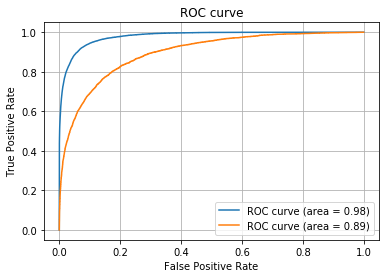

In [12]:
y_val_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
auc_val = metrics.auc(fpr_val, tpr_val)

y_train_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_train_pred)
auc_train = metrics.auc(fpr_train, tpr_train)

plt.plot(fpr_train, tpr_train, label='ROC curve (area = %.2f)'%auc_train)
plt.plot(fpr_val, tpr_val, label='ROC curve (area = %.2f)'%auc_val)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [13]:
importance = pd.Series(gbm.feature_importance())
clf_imp = importance[200:]
clf_imp.index = names
print(importance.max())
print(importance.min())
print(clf_imp)

1102
4
LogisticRegression          91
MLPClassifier              197
RandomForestClassifier      71
RandomForestClassifier     120
RandomForestClassifier     223
RandomForestClassifier     103
RandomForestClassifier     125
RandomForestClassifier     110
RandomForestClassifier      84
RandomForestClassifier     149
RandomForestClassifier     122
AdaBoostClassifier         331
AdaBoostClassifier         367
AdaBoostClassifier         148
AdaBoostClassifier         138
AdaBoostClassifier         144
AdaBoostClassifier         137
AdaBoostClassifier         131
AdaBoostClassifier         304
AdaBoostClassifier         373
AdaBoostClassifier         408
AdaBoostClassifier         594
GaussianNB                1102
GaussianNB                 144
GaussianNB                  31
GaussianNB                   4
GaussianNB                   8
dtype: int64


In [14]:
test_df = pd.read_csv('test.csv')
IDs = test_df['ID_code']
X_test = test_df.drop(['ID_code'], axis=1)
X_test = sc.fit_transform(X_test)

In [15]:
predicts = []
for clf in clfs:
    name = str(clf).split('(')[0]
    print('predicting with %s.....' % name)
    if hasattr(clf,'predict_proba') == True:
        pred_test = clf.predict_proba(X_test)[:,0]
        predicts.append(pred_test)
    else:
        pred_test = clf.predict(X_test)
        predicts.append(pred_test)
        
param_clf = np.array(predicts).T
X_test = np.hstack([X_test, param_clf])

predicting with LogisticRegression.....
predicting with MLPClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with RandomForestClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with AdaBoostClassifier.....
predicting with GaussianNB.....
predicting with GaussianNB.....
predicting with GaussianN

In [16]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
se_pred = pd.Series(y_pred)
submission = pd.concat([IDs, se_pred], axis=1)
submission.columns  = ['ID_code', 'target']

In [17]:
submission.to_csv('submission_clf.csv', index=False)